<a href="https://colab.research.google.com/github/shivams289/Projects/blob/main/Quantile_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [151]:
plt.rcParams["figure.figsize"] = (12,8)

In [152]:
df = pd.read_csv('/content/drive/MyDrive/dataverse_files/quantile_raw.csv')

In [153]:
#The shape is different than used in research paper for visualising the summar statistics
df.shape

(821788, 21)

In [154]:
df.dtypes

t              object
k200          float64
k200volume    float64
k200_wn       float64
fprc          float64
fvolume       float64
f_wn          float64
vkospi        float64
iv1           float64
iv2           float64
iv2_Call      float64
iv2_put       float64
iv2_itm       float64
iv2_atm       float64
iv2_otm       float64
iv3           float64
iv3_Call      float64
iv3_put       float64
iv3_itm       float64
iv3_atm       float64
iv3_otm       float64
dtype: object

In [155]:
df.head()

,t,k200,k200volume,k200_wn,fprc,fvolume,f_wn,vkospi,iv1,iv2,iv2_Call,iv2_put,iv2_itm,iv2_atm,iv2_otm,iv3,iv3_Call,iv3_put,iv3_itm,iv3_atm,iv3_otm
0,2005-01-03 10:01,115.65,6971224.0,8.813920e+10,116.00,2658.0,1.540000e+11,NaN,20.879310,28.419010,20.265149,35.895286,19.621235,19.726609,29.636174,24.784842,19.833360,28.415928,21.272830,20.700473,26.536521
1,2005-01-03 10:02,115.54,915131.0,9.772912e+09,116.00,1486.0,8.618300e+10,NaN,21.112680,23.072276,21.082338,28.444816,21.072528,20.301699,23.799501,24.683726,20.555183,27.986560,21.365015,20.928948,26.464211
2,2005-01-03 10:03,115.42,771750.0,9.474952e+09,116.00,1214.0,7.039850e+10,NaN,21.336045,22.517448,21.587777,25.139568,22.057481,21.043458,22.964765,23.515884,21.098337,26.537817,21.543264,21.079843,25.045842
3,2005-01-03 10:04,115.55,991206.0,9.716512e+09,116.05,1876.0,1.090000e+11,NaN,20.977045,21.688313,20.468253,24.008019,20.709042,20.463135,22.800739,24.261755,20.575309,27.640997,21.749790,20.930062,25.341208
4,2005-01-03 10:05,115.60,1053666.0,1.272223e+10,115.80,2064.0,1.200000e+11,NaN,20.863665,22.366039,19.995091,26.196032,17.096130,19.634384,23.386053,24.308382,19.610685,27.538049,21.211115,21.128049,25.889319


In [156]:
df['Dates'] = pd.to_datetime(df['t']).dt.date
df['Time'] = pd.to_datetime(df['t']).dt.time

In [157]:
#set(df['Time'])

In [158]:
#Lets check if we have null values
df.isnull().sum()


t                  0
k200             289
k200volume       289
k200_wn          289
fprc             289
fvolume          289
f_wn             289
vkospi        391461
iv1                0
iv2                0
iv2_Call           0
iv2_put            0
iv2_itm        78801
iv2_atm           26
iv2_otm            1
iv3                0
iv3_Call           0
iv3_put            0
iv3_itm        78801
iv3_atm           26
iv3_otm            1
Dates              0
Time               0
dtype: int64

In [159]:
#df

In [160]:
plt.style.use('fivethirtyeight')

In [161]:
#Here we are extracting data which is needed, although paper says 'KOSPI Volume' but after checking summary statics it came out that the summary 
#statistics didn't match volumne rather matched when using weight avg. of price*vol

dff = df[['Dates','Time', 'k200', 'k200_wn','f_wn', 'iv2' ]]

In [162]:
t_T = [i/len(dff) for i in range(1,len(dff)+1)]

In [165]:
#We will need this to control time trend
print(len(t_T))

print(len(dff))

821788
821788


In [166]:
dff['t_T'] = t_T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [167]:
dff.isnull().sum()

Dates        0
Time         0
k200       289
k200_wn    289
f_wn       289
iv2          0
t_T          0
dtype: int64

In [168]:
#Drop the Nan's
dff.dropna(axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [169]:
dff.isnull().sum()

Dates      0
Time       0
k200       0
k200_wn    0
f_wn       0
iv2        0
t_T        0
dtype: int64

In [170]:
dff

,Dates,Time,k200,k200_wn,f_wn,iv2,t_T
0,2005-01-03,10:01:00,115.65,8.813920e+10,1.540000e+11,28.419010,0.000001
1,2005-01-03,10:02:00,115.54,9.772912e+09,8.618300e+10,23.072276,0.000002
2,2005-01-03,10:03:00,115.42,9.474952e+09,7.039850e+10,22.517448,0.000004
3,2005-01-03,10:04:00,115.55,9.716512e+09,1.090000e+11,21.688313,0.000005
4,2005-01-03,10:05:00,115.60,1.272223e+10,1.200000e+11,22.366039,0.000006
...,...,...,...,...,...,...,...
821783,2014-06-30,14:45:00,259.74,1.211954e+10,4.592970e+10,12.104030,0.999995
821784,2014-06-30,14:46:00,259.80,1.332567e+10,5.259748e+10,12.797122,0.999996
821785,2014-06-30,14:47:00,259.84,1.073104e+10,1.161628e+10,11.988567,0.999998
821786,2014-06-30,14:48:00,259.79,1.404962e+10,3.184825e+10,11.674133,0.999999


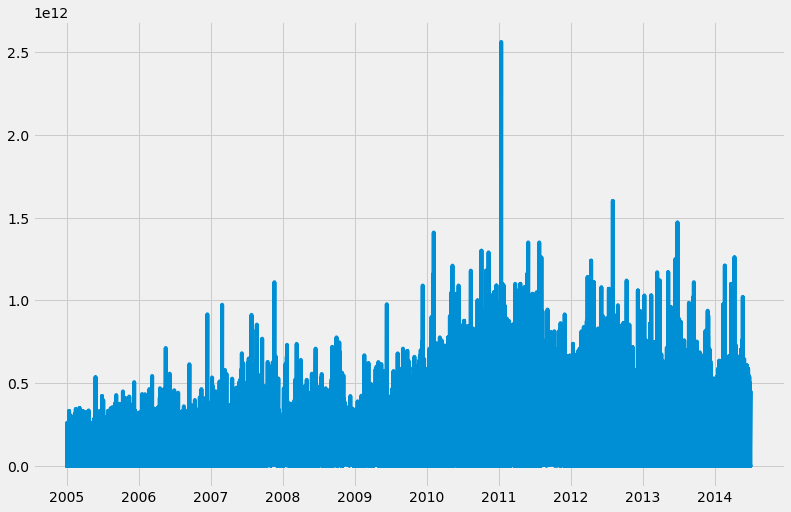

In [171]:
plt.plot(dff['Dates'], dff['f_wn'])

In [172]:
#Creating the independent variables as described in the paper

dff['r'] = (dff['k200'].shift(-1) - dff['k200'])/dff['k200'] *100 #Percentage return

dff['lsv'] = np.log(dff['k200_wn']) #natural log of ..
dff['lfv'] = np.log(dff['f_wn'])    #natural log of...

dff['div'] = (dff['iv2'].shift(-1) - dff['iv2']) #1st difference of implied volatality

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/

In [173]:
#Make infinite values 0 as volumes at those points were 0

dff.replace([np.inf, -np.inf], np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [174]:
dff_check = dff.dropna(axis = 0)
dff_check

,Dates,Time,k200,k200_wn,f_wn,iv2,t_T,r,lsv,lfv,div
0,2005-01-03,10:01:00,115.65,8.813920e+10,1.540000e+11,28.419010,0.000001,-0.095115,25.202183,25.760218,-5.346735
1,2005-01-03,10:02:00,115.54,9.772912e+09,8.618300e+10,23.072276,0.000002,-0.103860,23.002880,25.179739,-0.554828
2,2005-01-03,10:03:00,115.42,9.474952e+09,7.039850e+10,22.517448,0.000004,0.112632,22.971918,24.977438,-0.829135
3,2005-01-03,10:04:00,115.55,9.716512e+09,1.090000e+11,21.688313,0.000005,0.043271,22.997093,25.414614,0.677726
4,2005-01-03,10:05:00,115.60,1.272223e+10,1.200000e+11,22.366039,0.000006,-0.242215,23.266617,25.510758,0.328027
...,...,...,...,...,...,...,...,...,...,...,...
821782,2014-06-30,14:44:00,259.63,1.235064e+10,7.961225e+09,12.020005,0.999994,0.042368,23.236974,22.797849,0.084025
821783,2014-06-30,14:45:00,259.74,1.211954e+10,4.592970e+10,12.104030,0.999995,0.023100,23.218085,24.550378,0.693092
821784,2014-06-30,14:46:00,259.80,1.332567e+10,5.259748e+10,12.797122,0.999996,0.015396,23.312958,24.685934,-0.808555
821785,2014-06-30,14:47:00,259.84,1.073104e+10,1.161628e+10,11.988567,0.999998,-0.019243,23.096407,23.175673,-0.314433


In [175]:

df_final = dff_check[['r', 'lsv', 'lfv', 'div', 't_T']]

In [176]:
#Summary Statistics

df_final.describe(percentiles=[0.01, 0.05, 0.25, 0.75, 0.95, 0.99])

,r,lsv,lfv,div,t_T
count,821496.000000,821496.000000,821496.000000,821496.000000,821496.000000
mean,0.000127,22.837721,24.444221,-0.000026,0.500060
std,0.075222,0.599241,1.150049,1.633906,0.288655
min,-6.522082,19.940613,17.854607,-34.178617,0.000001
1%,-0.159263,21.424481,20.760871,-4.684548,0.010007
5%,-0.074765,21.886018,22.293440,-2.372332,0.050054
25%,-0.024831,22.436200,23.870779,-0.651497,0.250091
50%,0.000000,22.825376,24.587061,-0.006164,0.500126
75%,0.024709,23.234009,25.203068,0.643788,0.750038
95%,0.075755,23.819710,26.031534,2.383261,0.949980


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


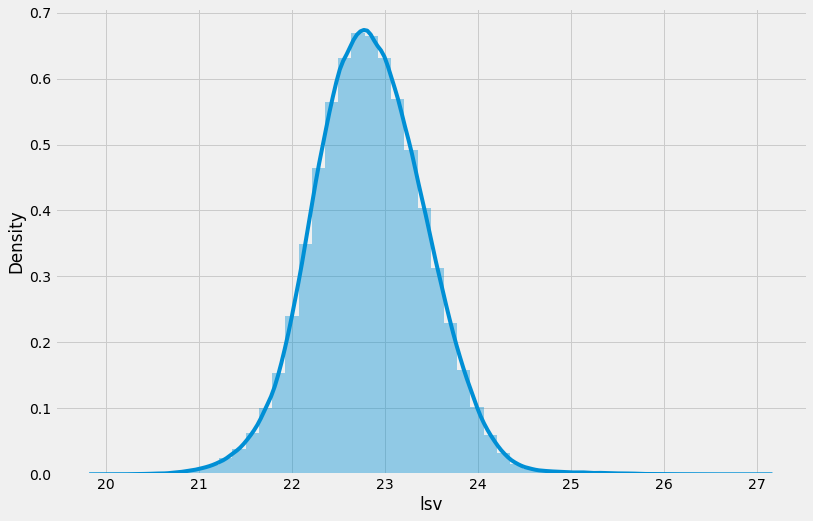

In [177]:
#Distribution of lsv
sns.distplot(a = df_final['lsv'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


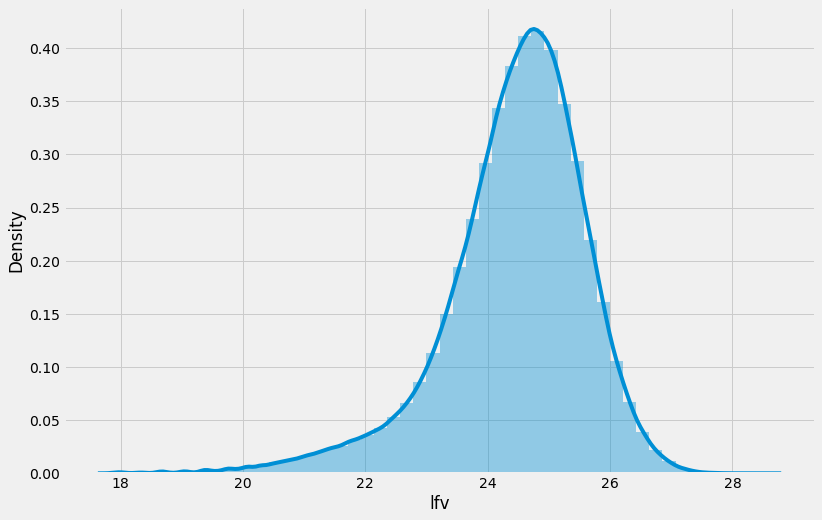

In [178]:
#Distribution suggesting negative skewness even after using log transformation
sns.distplot(a= df_final['lfv'])

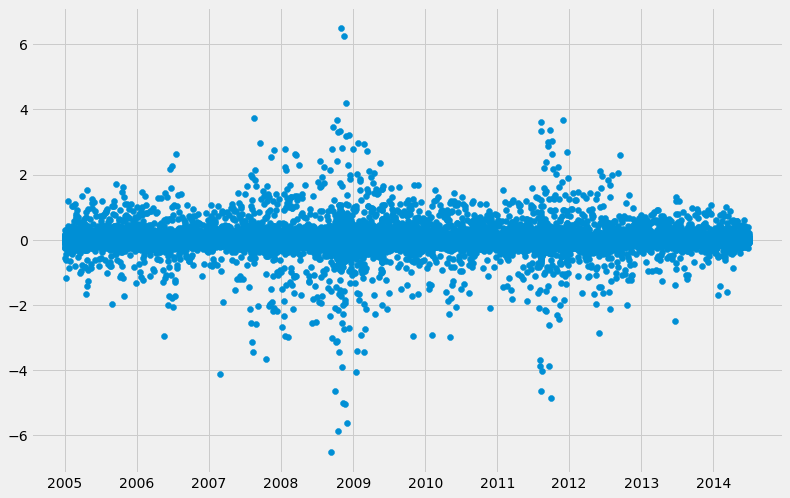

In [179]:
plt.scatter(x= dff_check['Dates']    ,y= df_final['r'])


In [180]:
# Timings of peak morning and afternoon sessions
from datetime import time
start1 = time(9,0) 
end1 = time(10,0) 
start2 = time(13,50) 
end2 = time(14,50)

In [181]:
#Dummy var to induce effect of morning and afternoon peak timing

DOP_t = dff_check['Time'].apply(lambda x:1 if x>=start1 and x<end1 else 0) 
DCL_t = dff_check['Time'].apply(lambda x:1 if x>=start2 and x<end2 else 0)


In [182]:
print(len(DOP_t))
print(len(DCL_t))

821496
821496


In [183]:
#Adding dummy to our dataframe

df_final['DOP_t'] = DOP_t
df_final['DCL_t'] = DCL_t

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [184]:
df_final.tail()

,r,lsv,lfv,div,t_T,DOP_t,DCL_t
821782,0.042368,23.236974,22.797849,0.084025,0.999994,0,1
821783,0.023100,23.218085,24.550378,0.693092,0.999995,0,1
821784,0.015396,23.312958,24.685934,-0.808555,0.999996,0,1
821785,-0.019243,23.096407,23.175673,-0.314433,0.999998,0,1
821786,0.019246,23.365862,24.184248,1.751378,0.999999,0,1


In [185]:
# Variable that will be same for All Models

rt_1 = df_final['r'].shift(1)
rt_2 = df_final['r'].shift(2)
rt_3 = df_final['r'].shift(3)



In [186]:
len(rt_1)

821496

In [187]:
#Adding the variables to our final dataframe

df_final['rt_1'] = rt_1
df_final['rt_2'] = rt_2
df_final['rt_3'] = rt_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [189]:
#To be needed for Model A in Panel A of paper
lsvt_1 = df_final['lsv'].shift(1)
lsvt_2 = df_final['lsv'].shift(2)
lsvt_3 = df_final['lsv'].shift(3)

#To be needed for Model B in Panel B of paper
lfvt_1 = df_final['lfv'].shift(1)
lfvt_2 = df_final['lfv'].shift(2)
lfvt_3 = df_final['lfv'].shift(3)

#To be needed for Model C in Panel C of paper
fst_1 = lfvt_1 - lsvt_1
fst_2 = lfvt_2 - lsvt_2
fst_3 = lfvt_3 - lsvt_3

In [190]:
#Model A
df_final['lsvt_1'] = lsvt_1
df_final['lsvt_2'] = lsvt_2
df_final['lsvt_3'] = lsvt_3

#Model B
df_final['lfvt_1'] = lfvt_1
df_final['lfvt_2'] = lfvt_2
df_final['lfvt_3'] = lfvt_3

#Model C
df_final['fst_1'] = fst_1
df_final['fst_2'] = fst_2
df_final['fst_3'] = fst_3

In [191]:
df_final

,r,lsv,lfv,div,t_T,DOP_t,DCL_t,rt_1,rt_2,rt_3,lsvt_1,lsvt_2,lsvt_3,lfvt_1,lfvt_2,lfvt_3,fst_1,fst_2,fst_3
0,-0.095115,25.202183,25.760218,-5.346735,0.000001,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.103860,23.002880,25.179739,-0.554828,0.000002,0,0,-0.095115,NaN,NaN,25.202183,NaN,NaN,25.760218,NaN,NaN,0.558035,NaN,NaN
2,0.112632,22.971918,24.977438,-0.829135,0.000004,0,0,-0.103860,-0.095115,NaN,23.002880,25.202183,NaN,25.179739,25.760218,NaN,2.176858,0.558035,NaN
3,0.043271,22.997093,25.414614,0.677726,0.000005,0,0,0.112632,-0.103860,-0.095115,22.971918,23.002880,25.202183,24.977438,25.179739,25.760218,2.005520,2.176858,0.558035
4,-0.242215,23.266617,25.510758,0.328027,0.000006,0,0,0.043271,0.112632,-0.103860,22.997093,22.971918,23.002880,25.414614,24.977438,25.179739,2.417521,2.005520,2.176858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821782,0.042368,23.236974,22.797849,0.084025,0.999994,0,1,-0.023104,-0.023099,0.057781,23.184001,23.050166,23.123372,23.970280,24.232121,23.891086,0.786279,1.181955,0.767714
821783,0.023100,23.218085,24.550378,0.693092,0.999995,0,1,0.042368,-0.023104,-0.023099,23.236974,23.184001,23.050166,22.797849,23.970280,24.232121,-0.439125,0.786279,1.181955
821784,0.015396,23.312958,24.685934,-0.808555,0.999996,0,1,0.023100,0.042368,-0.023104,23.218085,23.236974,23.184001,24.550378,22.797849,23.970280,1.332293,-0.439125,0.786279
821785,-0.019243,23.096407,23.175673,-0.314433,0.999998,0,1,0.015396,0.023100,0.042368,23.312958,23.218085,23.236974,24.685934,24.550378,22.797849,1.372976,1.332293,-0.439125


In [192]:
df_final.dropna(axis = 0, inplace=True)

In [193]:
len(df_final)

821493

In [194]:
df_final['t_T_s'] = df_final['t_T']**2

df_final['rt_1_s'] = df_final['rt_1']**2
df_final['rt_2_s'] = df_final['rt_2']**2
df_final['rt_3_s'] = df_final['rt_3']**2

In [201]:
df_final.reset_index(inplace=True)

In [202]:
df_final.columns

Index(['index', 'r', 'lsv', 'lfv', 'div', 't_T', 'DOP_t', 'DCL_t', 'rt_1',
       'rt_2', 'rt_3', 'lsvt_1', 'lsvt_2', 'lsvt_3', 'lfvt_1', 'lfvt_2',
       'lfvt_3', 'fst_1', 'fst_2', 'fst_3', 't_T_s', 'rt_1_s', 'rt_2_s',
       'rt_3_s'],
      dtype='object')

In [203]:
data_A = df_final[['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lsvt_1',
       'lsvt_2', 'lsvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']]

In [204]:
data_B = df_final[['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lfvt_1', 
       'lfvt_2', 'lfvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']]

In [205]:
data_C = df_final[['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'fst_1',
       'fst_2', 'fst_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']]

In [206]:
data_A

,r,DOP_t,DCL_t,rt_1,rt_2,rt_3,t_T,lsvt_1,lsvt_2,lsvt_3,t_T_s,rt_1_s,rt_2_s,rt_3_s
0,0.043271,0,0,0.112632,-0.103860,-0.095115,0.000005,22.971918,23.002880,25.202183,2.369193e-11,0.012686,0.010787,0.009047
1,-0.242215,0,0,0.043271,0.112632,-0.103860,0.000006,22.997093,22.971918,23.002880,3.701864e-11,0.001872,0.012686,0.010787
2,0.164759,0,0,-0.242215,0.043271,0.112632,0.000007,23.266617,22.997093,22.971918,5.330684e-11,0.058668,0.001872,0.012686
3,0.129859,0,0,0.164759,-0.242215,0.043271,0.000009,23.177030,23.266617,22.997093,7.255653e-11,0.027146,0.058668,0.001872
4,0.069168,0,0,0.129859,0.164759,-0.242215,0.000010,22.927754,23.177030,23.266617,9.476771e-11,0.016863,0.027146,0.058668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821488,0.042368,0,1,-0.023104,-0.023099,0.057781,0.999994,23.184001,23.050166,23.123372,9.999878e-01,0.000534,0.000534,0.003339
821489,0.023100,0,1,0.042368,-0.023104,-0.023099,0.999995,23.236974,23.184001,23.050166,9.999903e-01,0.001795,0.000534,0.000534
821490,0.015396,0,1,0.023100,0.042368,-0.023104,0.999996,23.218085,23.236974,23.184001,9.999927e-01,0.000534,0.001795,0.000534
821491,-0.019243,0,1,0.015396,0.023100,0.042368,0.999998,23.312958,23.218085,23.236974,9.999951e-01,0.000237,0.000534,0.001795


In [207]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [208]:
quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.95, 0.9, 0.99]

In [209]:
data_A.columns

Index(['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lsvt_1',
       'lsvt_2', 'lsvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s'],
      dtype='object')

In [211]:
targ_col = ['r']
feat_col = ['DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lsvt_1',
       'lsvt_2', 'lsvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s']

In [215]:
mod = smf.quantreg("r ~ DOP_t + DCL_t + rt_1 + rt_2 + rt_3 + t_T + lsvt_1 + lsvt_2 + lsvt_3 + t_T_s + rt_1_s + rt_2_s + rt_3_s", data_A)


In [216]:
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["lsvt_1"], res.params["lsvt_2"], res.params['lsvt_3']] 

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=["q", "lsvt_1", "lsvt_2", "lsvt_3"])

In [217]:
models

,q,lsvt_1,lsvt_2,lsvt_3
0,0.01,-0.007467,-0.006347,-0.020930
1,0.05,-0.005896,-0.003652,-0.007665
2,0.10,-0.004795,-0.002841,-0.004833
3,0.25,-0.002735,-0.001359,-0.002038
4,0.50,-0.000251,-0.000040,0.000044
5,0.75,0.002359,0.001137,0.001907
6,0.95,0.007050,0.003425,0.007330
7,0.90,0.005073,0.002408,0.004671
8,0.99,0.013321,0.005958,0.020437


In [218]:
data_B.columns

Index(['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'lfvt_1',
       'lfvt_2', 'lfvt_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s'],
      dtype='object')

In [220]:
mod2 = smf.quantreg("r ~ DOP_t + DCL_t + rt_1 + rt_2 + rt_3 + t_T + lfvt_1 + lfvt_2 + lfvt_3 + t_T_s + rt_1_s + rt_2_s + rt_3_s", data_B)


In [221]:
def fit_model2(q):
    res = mod2.fit(q=q)
    return [q, res.params["lfvt_1"], res.params["lfvt_2"], res.params['lfvt_3']] 

models2 = [fit_model2(x) for x in quantiles]
models2 = pd.DataFrame(models2, columns=["q", "lfvt_1", "lfvt_2", "lfvt_3"])

In [222]:
models2

,q,lfvt_1,lfvt_2,lfvt_3
0,0.01,-0.003619,-0.002311,-0.005645
1,0.05,-0.002500,-0.001671,-0.002397
2,0.10,-0.002005,-0.001310,-0.001585
3,0.25,-0.001154,-0.000658,-0.000611
4,0.50,-0.000066,-0.000080,0.000083
5,0.75,0.000904,0.000446,0.000819
6,0.95,0.002164,0.001540,0.002313
7,0.90,0.001801,0.001035,0.001585
8,0.99,0.002554,0.001677,0.005424


In [223]:
data_C.columns

Index(['r', 'DOP_t', 'DCL_t', 'rt_1', 'rt_2', 'rt_3', 't_T', 'fst_1', 'fst_2',
       'fst_3', 't_T_s', 'rt_1_s', 'rt_2_s', 'rt_3_s'],
      dtype='object')

In [224]:
mod3 = smf.quantreg("r ~ DOP_t + DCL_t + rt_1 + rt_2 + rt_3 + t_T + fst_1 + fst_2 + fst_3 + t_T_s + rt_1_s + rt_2_s + rt_3_s", data_C)


In [225]:
def fit_model3(q):
    res = mod3.fit(q=q)
    return [q, res.params["fst_1"], res.params["fst_2"], res.params['fst_3']] 

models3 = [fit_model3(x) for x in quantiles]
models3 = pd.DataFrame(models3, columns=["q", "fst_1", "fst_2", "fst_3"])

In [226]:
models3

,q,fst_1,fst_2,fst_3
0,0.01,-0.002112,-0.000566,-0.002985
1,0.05,-0.001543,-0.000834,-0.001159
2,0.10,-0.001204,-0.000687,-0.000656
3,0.25,-0.000685,-0.000329,-0.000132
4,0.50,-0.000035,-0.000065,0.000099
5,0.75,0.000468,0.000159,0.000426
6,0.95,0.000954,0.000684,0.000980
7,0.90,0.000907,0.000420,0.000694
8,0.99,-0.000042,0.000184,0.002772


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error